In [1]:
import re
import warnings
import numpy as np
import pandas as pd
import scipy
import sklearn
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm
from statannot import add_stat_annotation

from utils import quick_load_liuzhong_health_check_data
from plot_utils import Stack, Scatter, Sankey, BxxPvalue

%matplotlib inline
%load_ext autoreload
%autoreload 2
warnings.filterwarnings("ignore")

df_table1plus, l_consecute_man2p, l_consecute_man3p, df_table1plus_3p_revMM, df_meta_group, rename_dict = quick_load_liuzhong_health_check_data()
workdir = "/cluster/home/bqhu_jh/projects/healthman/analysis/liuzhong/human/clinical/figures"

# ECG Overall

## Scatter plot results

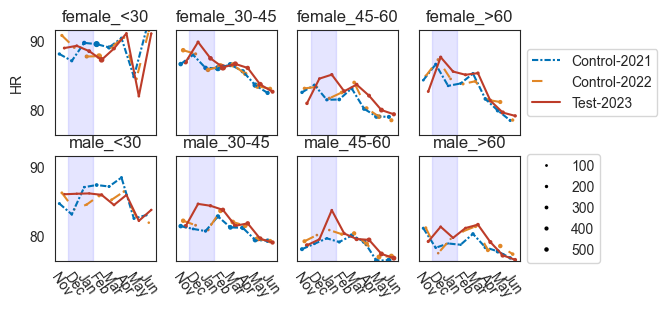

In [2]:
l_months2 = [11,12,1,2,3,4,5,6]

tag = "v000763"
plt_scatter = Scatter(n_cols=5, figsize=(6,3), n_rows=5, rename_dict=rename_dict)
fig,df_scatter_3p = plt_scatter.plot_scatter_ax_plus(df_table1plus_3p_revMM, x="month", y=tag, hue="period", 
                                                         order=[11,12,1,2,3,4,5,6], hue_order=["Control-2021", "Control-2022", "Test-2023"])
fig.savefig(f"{workdir}/FigureS2_A.pdf")

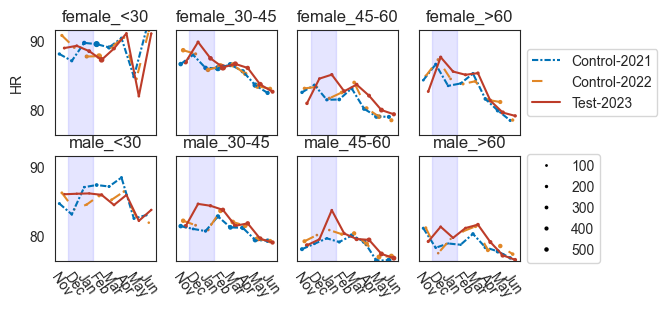

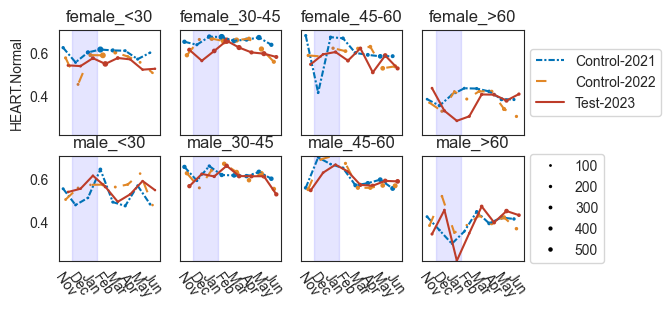

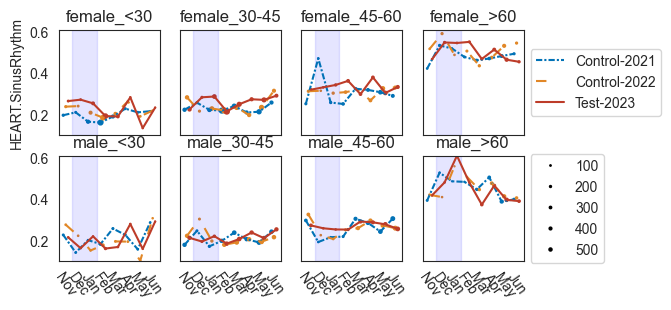

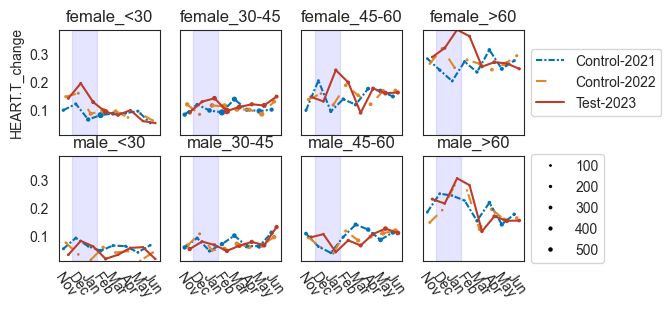

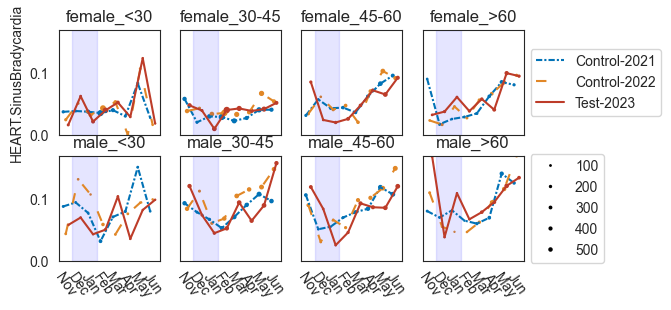

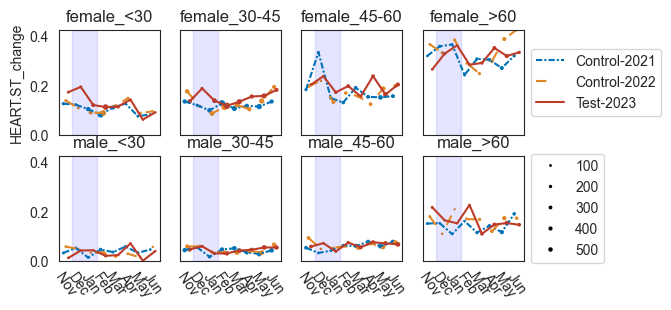

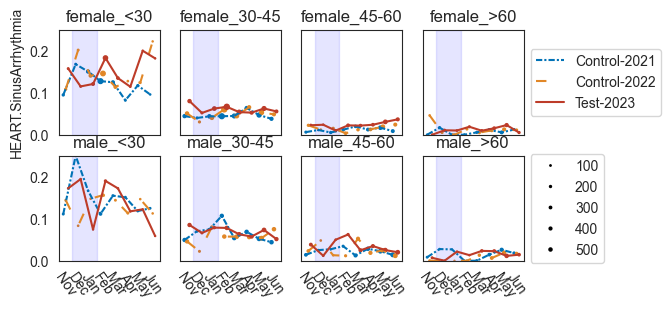

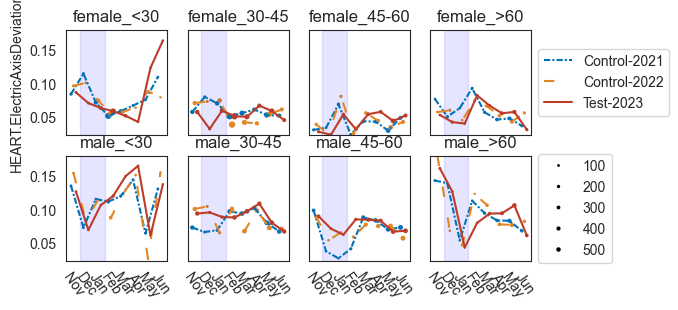

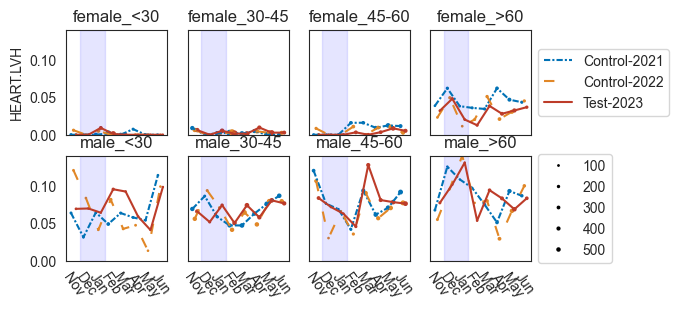

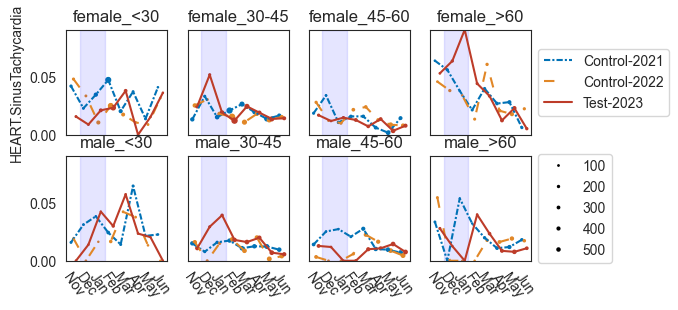

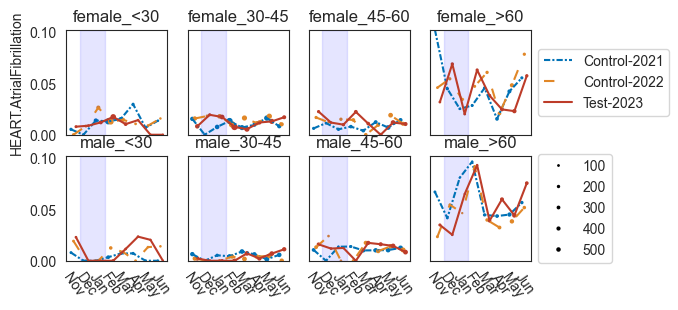

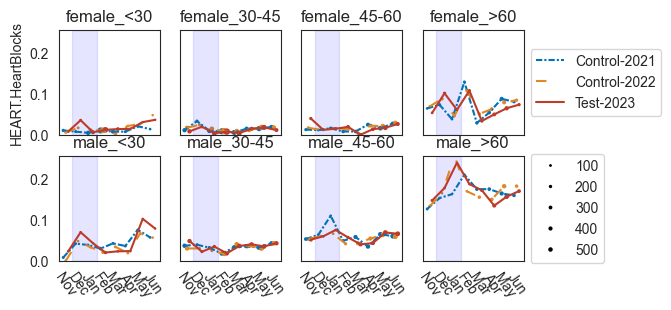

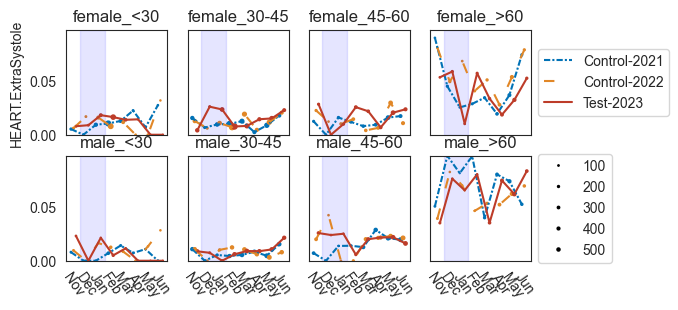

In [3]:
for tag in [ "v000763",
        'HEART.Normal',
        'HEART.SinusRhythm', 'HEART.T_change', 'HEART.SinusBradycardia',
        'HEART.ST_change', 'HEART.SinusArrhythmia',
        'HEART.ElectricAxisDeviation', 'HEART.LVH', 'HEART.SinusTachycardia',
        'HEART.AtrialFibrillation', 'HEART.HeartBlocks', 'HEART.ExtraSystole'
    ]:
    fig,df_scatter_3p = plt_scatter.plot_scatter_ax_plus(df_table1plus_3p_revMM, tag, order=l_months2)


len                                      \
month                            1     2    3    4    5    6    11   12   
gender age_groups period                                                  
female 30-45      Control-2021  525  1191  716  408  799  422  451  150   
                  Control-2022  556  1284  734  443  775  391  473  164   
                  Test-2023     577  1308  733  418  728  351  487  154   
       45-60      Control-2021  188   252  251  324  566  347  161   88   
                  Control-2022  198   277  249  314  576  373  178   82   
                  Test-2023     203   313  276  294  587  382  177   84   
       <30        Control-2021  432  1148  392  134  145   73  190  131   
                  Control-2022  377  1018  343   94  113   63  166  119   
                  Test-2023     331   919  289   70   65   55  127  113   
       >60        Control-2021   79   140  175  259  354  162   78  178   
                  Control-2022   88   148  197  288  393  178   87  183   
                  Test-2023      99   158  209  323  434  191   94  188   
male   30-45      Control-2021  188   458  554  479  649  521  465  128   
                  Control-2022  199   486  576  497  633  506  467  134   
                  Test-2023     203   499  556  451  573  446  458  136   
       45-60      Control-2021   73   144  397  490  575  641  284   79   
                  Control-2022   76   169  400  425  570  663  302   83   
                  Test-2023      80   176  401  372  552  593  312   84   
       <30        Control-2021   78   287  142  139   93   88  126   96   
                  Control-2022   61   240  118  106   75   71  104   84   
                  Test-2023      47   200   87   85   49   51   87   72   
       >60        Control-2021   37    62  201  275  421  220  119   72   
                  Control-2022   43    65  226  308  468  231  128   73   
                  Test-2023      46    75  256  350  519  277  143   79   

                                    mean            ... func_q5      func_q95  \
month                                 1         2   ...      11   12       1    
gender age_groups period                            ...                         
female 30-45      Control-2021  0.099048  0.092359  ...     0.0  0.0      0.0   
                  Control-2022  0.116906  0.113318  ...     0.0  0.0      0.0   
                  Test-2023     0.142114  0.097095  ...     0.0  0.0      0.0   
       45-60      Control-2021  0.095745  0.138889  ...     0.0  0.0      0.0   
                  Control-2022  0.118687  0.187726  ...     0.0  0.0      0.0   
                  Test-2023     0.241379  0.198083  ...     0.0  0.0      0.0   
       <30        Control-2021  0.067130  0.082753  ...     0.0  0.0      0.0   
                  Control-2022  0.087533  0.097741  ...     0.0  0.0      0.0   
                  Test-2023     0.128399  0.094124  ...     0.0  0.0      0.0   
       >60        Control-2021  0.202532  0.271429  ...     0.0  0.0      0.0   
                  Control-2022  0.250000  0.277027  ...     0.0  0.0      0.0   
                  Test-2023     0.383838  0.360759  ...     0.0  0.0      0.0   
male   30-45      Control-2021  0.047872  0.072052  ...     0.0  0.0      0.0   
                  Control-2022  0.050251  0.055556  ...     0.0  0.0      0.0   
                  Test-2023     0.068966  0.048096  ...     0.0  0.0      0.0   
       45-60      Control-2021  0.041096  0.097222  ...     0.0  0.0      0.0   
                  Control-2022  0.039474  0.118343  ...     0.0  0.0      0.0   
                  Test-2023     0.043750  0.085227  ...     0.0  0.0      0.0   
       <30        Control-2021  0.064103  0.048780  ...     0.0  0.0      0.0   
                  Control-2022  0.016393  0.060417  ...     0.0  0.0      0.0   
                  Test-2023     0.063830  0.020000  ...     0.0  0.0      0.0   
       >60        Control-2021  0.243243  0.225806  ...     0.

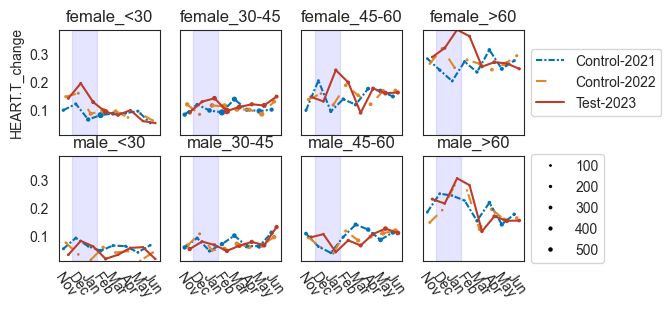

In [4]:
tag = 'HEART.T_change'
fig, df_res = plt_scatter.plot_scatter_ax_plus(df_table1plus_3p_revMM, tag, order=l_months2)
fig.savefig(f"{workdir}/Figure2_B.pdf")
df_res

## Stackplot for different types of ECG results.

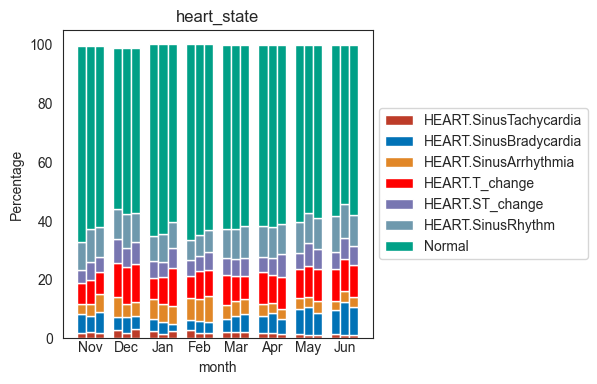

In [5]:
x = "month"
order= [11,12, 1,2,3, 4,5,6]
hue = "period"
hue_order = ["Control-2021", "Control-2022", "Test-2023"]
y = "heart_state"
y_order = ["HEART.SinusTachycardia",  "HEART.SinusBradycardia", "HEART.SinusArrhythmia","HEART.T_change", "HEART.ST_change", "HEART.SinusRhythm"]
pal = ["#BD3C29", "#0172B6", "#E18727", "#FF0000", "#7876B1", "#6F99AD", "#00A087", "#EE4C97"]

stack_plot = Stack(figsize=(4,4))
fig,df_tmp = stack_plot.plot_bar_stacked(df_table1plus_3p_revMM, x, hue, y, y_order, order=order, hue_order=hue_order, 
            cmap=pal)
fig.savefig(f"{workdir}/Figure2_A.pdf")
# fig.savefig("../../analysis/liuzhong/human/clinical/figures/Figure2_Stack.pdf")

## sankey plots

In [6]:

df_cnt = pd.melt(
    df_table1plus_3p_revMM[
        ["sample_id",'HEART.Normal', 'HEART.T_change', 'HEART.ST_change', 
                 "period", "month", "age_groups","gender"]
    ],id_vars = ["sample_id", "month", "period", "age_groups", "gender"]).\
    pivot(index=["sample_id","variable", "month", "age_groups", "gender"], columns="period", values="value").\
    reset_index().drop(["sample_id"], axis=1).value_counts().reset_index()

df_cnt_sub = df_cnt[(df_cnt["variable"]=="HEART.T_change") &
                    (df_cnt["month"]==1) & (df_cnt["gender"]=="female") &
                    (df_cnt["age_groups"]==">60")
]
df_cnt_sub = df_cnt[(df_cnt["variable"]=="HEART.T_change") &
                    (df_cnt["month"]==1) &
                    (df_cnt["gender"]=="female") &
                    (df_cnt["age_groups"]=="45-60")
]

print(df_cnt_sub.to_markdown())

|      | variable       |   month | age_groups   | gender   |   Control-2021 |   Control-2022 |   Test-2023 |   0 |
|-----:|:---------------|--------:|:-------------|:---------|---------------:|---------------:|------------:|----:|
|   91 | HEART.T_change |       1 | 45-60        | female   |              0 |              0 |           0 | 111 |
|  452 | HEART.T_change |       1 | 45-60        | female   |              0 |              0 |           1 |  20 |
|  912 | HEART.T_change |       1 | 45-60        | female   |              0 |              1 |           1 |   7 |
| 1023 | HEART.T_change |       1 | 45-60        | female   |              1 |              0 |           1 |   5 |
| 1033 | HEART.T_change |       1 | 45-60        | female   |              1 |              1 |           1 |   5 |
| 1241 | HEART.T_change |       1 | 45-60        | female   |              0 |              1 |           0 |   3 |
| 1309 | HEART.T_change |       1 | 45-60        | female   |           

In [7]:
l_pairs = [["Control-2021","Control-2022"], ["Control-2022","Test-2023"]]
month = 1
tag = "HEART.T_change"
l_age_groups = ["<30", "30-45", "45-60", ">60"]

plt_sankey = Sankey(rename_dict=rename_dict)

fig, sankey_dict = plt_sankey.plot_sankey_subplots(df_cnt, [11,12], tag, l_age_groups, l_pairs)
fig.show()
fig, sankey_dict = plt_sankey.plot_sankey_subplots(df_cnt, [3,4], tag, l_age_groups, l_pairs)
fig.show()
fig, sankey_dict = plt_sankey.plot_sankey_subplots(df_cnt, [1,2], tag, l_age_groups, l_pairs)
fig.show()

import plotly.io as pio
pio.write_image(fig,
                f"{workdir}/Figure2_C.pdf"
)